This is part of research we conduct at [Vocapouch](https://vocapouch.com). Our service is dedicated to language learners. The results of the study contained in this notebook was discribed [on our blog](https://blog.vocapouch.com/do-20-pages-of-a-book-gives-you-90-of-its-words-795a405afe70).

# How many pages do you have to read to know 90% of words in the book?

Author: Roman Kierzkowski

My English teacher claimed, that if I survive the first 20 pages of any book, the reading will get much easier because the words that occurred on those pages constitute 90% of all words in the book. So after you reach this threshold you don't have to go back and forth to the dictionary. 

Was he right?

We have verified this by using three books:

* **The Secret Adversary** detective fiction novel by Agatha Christie,
* **Eve's Diary** short story by Mark Twain,
* **Ulysses** the heavyweight champion in incomprehensiveness by James Joyce. 



## Reading in the books

In [1]:
%pylab inline

import spacy
import codecs
import seaborn as sns

from __future__ import unicode_literals
from collections import Counter
from matplotlib import pyplot


nlp = spacy.load('en')

Populating the interactive namespace from numpy and matplotlib


To analyze the book we use spacy. We get rid of anything that is not a word. We use only the canonical form. For example, we turn *went* to *go*, *plays* to *play* etc. We lowercase all the letters and all the pronouns are turned into '-PRON-'. As consequence, they are counted as one word.

In [11]:
def extract_words(path):
    with codecs.open(path, encoding='utf-8', mode="r") as book:
        content = book.read()
        doc = nlp(content)
        return [ token.lemma_ for token in doc if token.is_alpha ]
    
ulysses = extract_words('ulysses.txt')
eves_diary = extract_words('eves_diary.txt')
the_secret_adversary = extract_words('the_secret_adversary.txt')
finnegans = extract_words('finnegans.txt')

## Counting coverage

To count the coverage we go page by page and we check what percent of the book is covered by the words that appeared so far. We also calculate the percent of unique words that occurred already.

In [3]:
WPP = 300 

def count_coverage(words, wpp = WPP): # wpp - words per page
    coverage = []
    uniqueness = []
    occurances = Counter(words)
    counter = Counter()
    total = float(len(words))
    total_uniq = float(len(occurances.keys()))
    for n in xrange(len(words) // wpp):
        page = words[n*wpp:(n+1)*wpp]
        counter.update(page)
        s = sum((occurances[w] for w in counter.keys()))
        coverage.append(s/total)
        uniqueness.append(len(counter.keys())/total_uniq)
    return occurances, coverage, uniqueness


To find out how hard is the book we check, how many pages you will have to read, to meet the words that constitute 90% of the book.

In [4]:
def calculate_hardness(coverage):
    for i in range(len(coverage)):
        if coverage[i] > 0.9:
            break
    hardness = (i / float(len(coverage))) * 100
    return i, hardness

## Checking out the books

In [5]:
def analyze_book(words, title):
    occurances, coverage, uniqueness = count_coverage(words)
    page, hardness = calculate_hardness(coverage)
    file_name = title.lower().replace(' ', '_').replace('\'','') + '.png'
    
    print("Number of Pages: %.0f" % (len(words) / WPP))
    print("Number of Total Words: %s" % len(words))
    print("Number of Unique Words: %s" % len(occurances.keys()))
    print("You will know 90%% of words after %s pages which are %.2f%% of the book." % (page, hardness))
    print("At that page, you will know %.2f%% of unique words." % (uniqueness[page] * 100, ))
   
    pyplot.plot(coverage, color='b', label="All words")
    pyplot.plot(uniqueness, color='g', label="Unique words")
    pyplot.legend(loc=4)
    pyplot.title(title)
    pyplot.xlabel('Page')
    pyplot.ylabel('Coverage [%]')
    pyplot.savefig(file_name)
    

Number of Pages: 250
Number of Total Words: 75208
Number of Unique Words: 5248
You will know 90% of words after 40 pages which are 16.00% of the book.
At that page, you will know 39.21% of unique words.


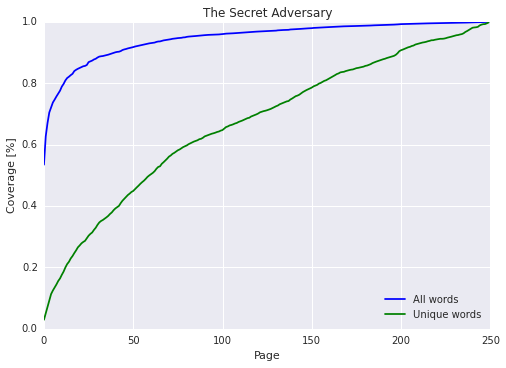

In [6]:
analyze_book(the_secret_adversary, title="The Secret Adversary")

Number of Pages: 22
Number of Total Words: 6858
Number of Unique Words: 1104
You will know 90% of words after 9 pages which are 40.91% of the book.
At that page, you will know 56.70% of unique words.


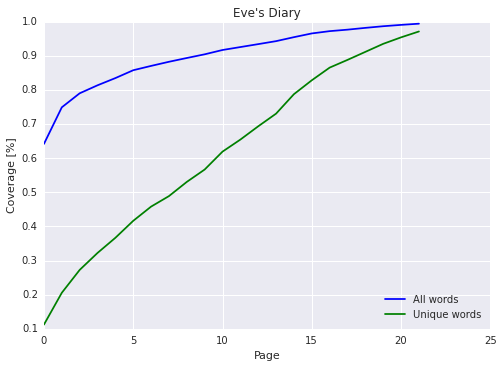

In [7]:
analyze_book(eves_diary, title="Eve's Diary")

Number of Pages: 870
Number of Total Words: 261202
Number of Unique Words: 23918
You will know 90% of words after 221 pages which are 25.40% of the book.
At that page, you will know 37.92% of unique words.


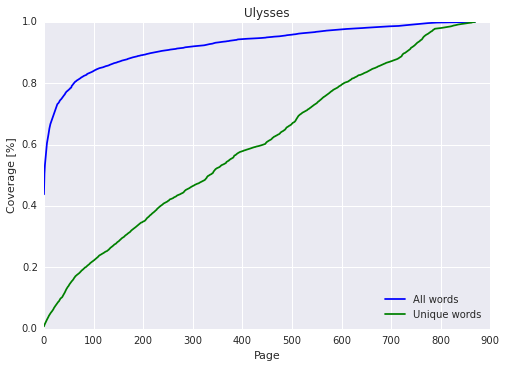

In [8]:
analyze_book(ulysses, title="Ulysses")

Number of Pages: 729
Number of Total Words: 218793
Number of Unique Words: 50872
You will know 90% of words after 387 pages which are 53.09% of the book.
At that page, you will know 60.64% of unique words.


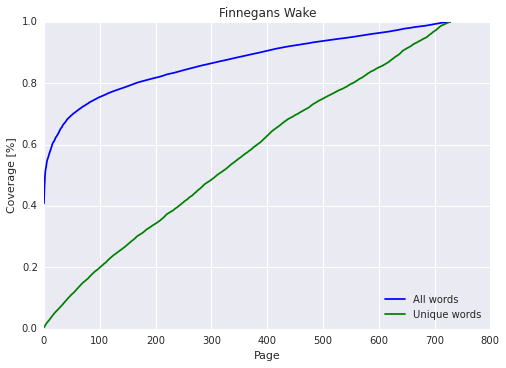

In [12]:
analyze_book(finnegans, title="Finnegans Wake")

# Conclusion

The new words will pop out through the entire book gradually, but when you get through the beginning the words you met so far will cover most of the book. However, the exact number of pages to read may vary depending on the book length and author's variegated language. It probably won't get much harder then Ulysses, where you need to read 221 pages (25% of the book). It is not 20 but my teacher was somewhat right.